# Swish-based classifier with data fixing and stochastic weght-averaging
- Swish activation, 4 layers, 100 neurons per layer
- Data is fixed with primary lepton at phi=0 and postive eta and the tau in the positive phi region
- Model uses a running average of previous weights
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 13.218s 


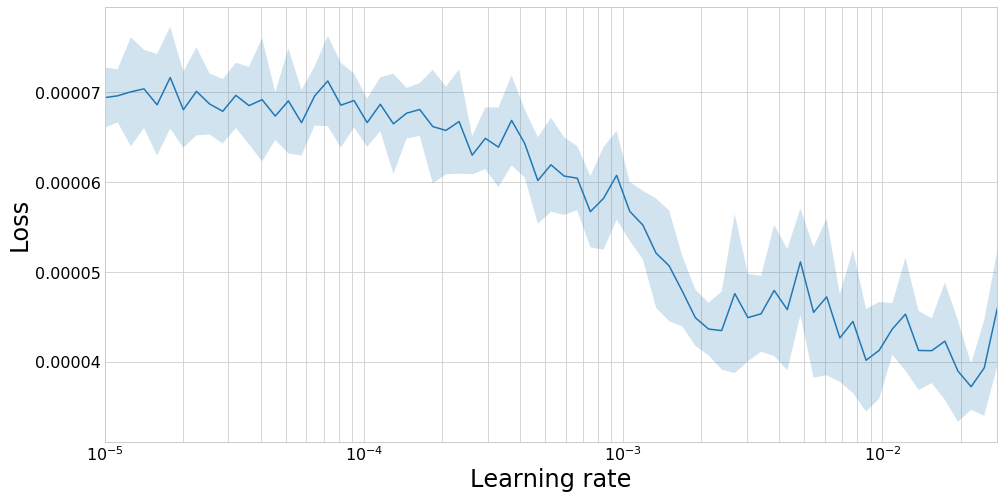

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.771899204264906e-05
2 New best found: 3.6215481446608645e-05
3 New best found: 3.490365450115969e-05
4 New best found: 3.454248139733188e-05
6 New best found: 3.38692692499824e-05
7 New best found: 3.386684804458032e-05
8 New best found: 3.3397341004603216e-05
16 New best found: 3.3274470934352374e-05
17 New best found: 3.319570223354285e-05
18 New best found: 3.300113577131422e-05
24 New best found: 3.2953129454244546e-05
SWA beginning
model is 0 epochs old
25 swa loss 3.307288253622971e-05, default loss 3.307288253622971e-05
model is 1 epochs old
new model is 1 epochs old
26 swa loss 3.271161049487535e-05, default loss 3.305401075262275e-05
26 New best found: 3.271161049487535e-05
model is 2 epochs old
new model is 2 epochs old
27 swa loss 3.260460649944593e-05, default loss 3.301718887509721e-05
27 New best found: 3.260460649944593e-05
model is 3 epochs old
new model is 3 epochs o

78 swa loss 3.229527911812908e-05, default loss 3.288158839637701e-05
78 New best found: 3.229527911812908e-05
model is 54 epochs old
new model is 54 epochs old
79 swa loss 3.2292374781283775e-05, default loss 3.326426108752207e-05
79 New best found: 3.2292374781283775e-05
model is 55 epochs old
new model is 55 epochs old
80 swa loss 3.228619286708299e-05, default loss 3.2689227398731056e-05
80 New best found: 3.228619286708299e-05
model is 56 epochs old
new model is 56 epochs old
81 swa loss 3.228243448283652e-05, default loss 3.292243731127026e-05
81 New best found: 3.228243448283652e-05
model is 57 epochs old
new model is 57 epochs old
82 swa loss 3.228099885356661e-05, default loss 3.283045539176563e-05
82 New best found: 3.228099885356661e-05
model is 58 epochs old
new model is 58 epochs old
83 swa loss 3.228182122357789e-05, default loss 3.295986470700449e-05
model is 59 epochs old
new model is 59 epochs old
84 swa loss 3.227907051180584e-05, default loss 3.296490990770726e-05
84

model is 114 epochs old
new model is 114 epochs old
139 swa loss 3.2283700568761425e-05, default loss 3.3842091184452986e-05
model is 115 epochs old
new model is 115 epochs old
140 swa loss 3.228720089515207e-05, default loss 3.351762485461845e-05
model is 116 epochs old
new model is 116 epochs old
141 swa loss 3.228961710895111e-05, default loss 3.3516372308573676e-05
model is 117 epochs old
new model is 117 epochs old
142 swa loss 3.229215060877867e-05, default loss 3.3439477040254476e-05
model is 118 epochs old
new model is 118 epochs old
143 swa loss 3.2294995063848925e-05, default loss 3.350689976096428e-05
model is 119 epochs old
new model is 119 epochs old
144 swa loss 3.229690837368716e-05, default loss 3.343828076056029e-05
model is 120 epochs old
new model is 120 epochs old
145 swa loss 3.229892085259771e-05, default loss 3.3786634559621155e-05
model is 121 epochs old
new model is 121 epochs old
146 swa loss 3.230149296709388e-05, default loss 3.374859295607274e-05
model is 1

58 swa loss 3.1608868518866336e-05, default loss 3.238876387707066e-05
58 New best found: 3.1608868518866336e-05
model is 34 epochs old
new model is 34 epochs old
59 swa loss 3.160575904577823e-05, default loss 3.229777159864956e-05
59 New best found: 3.160575904577823e-05
model is 35 epochs old
new model is 35 epochs old
60 swa loss 3.160170532988009e-05, default loss 3.198657816784574e-05
60 New best found: 3.160170532988009e-05
model is 36 epochs old
new model is 36 epochs old
61 swa loss 3.159710952965949e-05, default loss 3.223852362971871e-05
61 New best found: 3.159710952965949e-05
model is 37 epochs old
new model is 37 epochs old
62 swa loss 3.159777891161339e-05, default loss 3.25137896022598e-05
model is 38 epochs old
new model is 38 epochs old
63 swa loss 3.1591530358702616e-05, default loss 3.2071001310552034e-05
63 New best found: 3.1591530358702616e-05
model is 39 epochs old
new model is 39 epochs old
64 swa loss 3.159098303345374e-05, default loss 3.2219811909918946e-05


model is 90 epochs old
new model is 90 epochs old
115 swa loss 3.15488209722978e-05, default loss 3.235128934914398e-05
model is 91 epochs old
new model is 91 epochs old
116 swa loss 3.154887311146192e-05, default loss 3.2532606760942006e-05
model is 92 epochs old
new model is 92 epochs old
117 swa loss 3.155143169371947e-05, default loss 3.3146742573458016e-05
model is 93 epochs old
new model is 93 epochs old
118 swa loss 3.155115529432392e-05, default loss 3.234744583502421e-05
model is 94 epochs old
new model is 94 epochs old
119 swa loss 3.155203154228809e-05, default loss 3.22248896577957e-05
model is 95 epochs old
new model is 95 epochs old
120 swa loss 3.1553852965058754e-05, default loss 3.2698525152592986e-05
model is 96 epochs old
new model is 96 epochs old
121 swa loss 3.155572046464335e-05, default loss 3.2799302382701203e-05
model is 97 epochs old
new model is 97 epochs old
122 swa loss 3.1558426623326095e-05, default loss 3.2963093448002106e-05
model is 98 epochs old
new 

model is 14 epochs old
new model is 14 epochs old
39 swa loss 3.216810273841e-05, default loss 3.2393482306703825e-05
39 New best found: 3.216810273841e-05
model is 15 epochs old
new model is 15 epochs old
40 swa loss 3.2165448804154364e-05, default loss 3.2592132298467e-05
40 New best found: 3.2165448804154364e-05
model is 16 epochs old
new model is 16 epochs old
41 swa loss 3.215841351174791e-05, default loss 3.2498892555247295e-05
41 New best found: 3.215841351174791e-05
model is 17 epochs old
new model is 17 epochs old
42 swa loss 3.217120462631709e-05, default loss 3.303825860771209e-05
model is 18 epochs old
new model is 18 epochs old
43 swa loss 3.217256562443256e-05, default loss 3.279001181468788e-05
model is 19 epochs old
new model is 19 epochs old
44 swa loss 3.2155142664680504e-05, default loss 3.23803580809353e-05
44 New best found: 3.2155142664680504e-05
model is 20 epochs old
new model is 20 epochs old
45 swa loss 3.2153566026353455e-05, default loss 3.2874116910793584e-

model is 69 epochs old
new model is 69 epochs old
94 swa loss 3.204534860010872e-05, default loss 3.273866933540775e-05
94 New best found: 3.204534860010872e-05
model is 70 epochs old
new model is 70 epochs old
95 swa loss 3.204577012680259e-05, default loss 3.268088679776428e-05
model is 71 epochs old
new model is 71 epochs old
96 swa loss 3.204646216364481e-05, default loss 3.2700212144573754e-05
model is 72 epochs old
new model is 72 epochs old
97 swa loss 3.204708031628597e-05, default loss 3.283776986753312e-05
model is 73 epochs old
new model is 73 epochs old
98 swa loss 3.204680858101856e-05, default loss 3.2928702171014964e-05
model is 74 epochs old
new model is 74 epochs old
99 swa loss 3.204431849108982e-05, default loss 3.2960604940495134e-05
99 New best found: 3.204431849108982e-05
model is 75 epochs old
new model is 75 epochs old
100 swa loss 3.204773231469408e-05, default loss 3.3302103534216926e-05
model is 76 epochs old
new model is 76 epochs old
101 swa loss 3.20532961

29 swa loss 3.179683999915142e-05, default loss 3.1824841117486356e-05
29 New best found: 3.179683999915142e-05
model is 5 epochs old
new model is 5 epochs old
30 swa loss 3.165570295532234e-05, default loss 3.2076981132559016e-05
30 New best found: 3.165570295532234e-05
model is 6 epochs old
new model is 6 epochs old
31 swa loss 3.160481904051267e-05, default loss 3.279771303132293e-05
31 New best found: 3.160481904051267e-05
model is 7 epochs old
new model is 7 epochs old
32 swa loss 3.1574968292261476e-05, default loss 3.2074136566370725e-05
32 New best found: 3.1574968292261476e-05
model is 8 epochs old
new model is 8 epochs old
33 swa loss 3.156088798714336e-05, default loss 3.2452299747092185e-05
33 New best found: 3.156088798714336e-05
model is 9 epochs old
new model is 9 epochs old
34 swa loss 3.153238789382158e-05, default loss 3.2087900502665436e-05
34 New best found: 3.153238789382158e-05
model is 10 epochs old
new model is 10 epochs old
35 swa loss 3.148834188468754e-05, de

model is 61 epochs old
new model is 61 epochs old
86 swa loss 3.130312278954079e-05, default loss 3.180818635955802e-05
86 New best found: 3.130312278954079e-05
model is 62 epochs old
new model is 62 epochs old
87 swa loss 3.130282672937028e-05, default loss 3.205665496934671e-05
87 New best found: 3.130282672937028e-05
model is 63 epochs old
new model is 63 epochs old
88 swa loss 3.1302300779498184e-05, default loss 3.19795159084606e-05
88 New best found: 3.1302300779498184e-05
model is 64 epochs old
new model is 64 epochs old
89 swa loss 3.130158438871149e-05, default loss 3.204175157588906e-05
89 New best found: 3.130158438871149e-05
model is 65 epochs old
new model is 65 epochs old
90 swa loss 3.130195150151849e-05, default loss 3.210126976046013e-05
model is 66 epochs old
new model is 66 epochs old
91 swa loss 3.130082131247036e-05, default loss 3.1798243170487696e-05
91 New best found: 3.130082131247036e-05
model is 67 epochs old
new model is 67 epochs old
92 swa loss 3.130197222

14 New best found: 3.291369705839315e-05
15 New best found: 3.282406659272965e-05
17 New best found: 3.273573946207762e-05
19 New best found: 3.2682632442447354e-05
21 New best found: 3.256535376276588e-05
SWA beginning
model is 0 epochs old
25 swa loss 3.279695171368075e-05, default loss 3.279695171368075e-05
model is 1 epochs old
new model is 1 epochs old
26 swa loss 3.2295623068057463e-05, default loss 3.268606513011036e-05
26 New best found: 3.2295623068057463e-05
model is 2 epochs old
new model is 2 epochs old
27 swa loss 3.227511853328906e-05, default loss 3.307057754718698e-05
27 New best found: 3.227511853328906e-05
model is 3 epochs old
new model is 3 epochs old
28 swa loss 3.2214526017196476e-05, default loss 3.271098815457663e-05
28 New best found: 3.2214526017196476e-05
model is 4 epochs old
new model is 4 epochs old
29 swa loss 3.215170736948494e-05, default loss 3.291758623236092e-05
29 New best found: 3.215170736948494e-05
model is 5 epochs old
new model is 5 epochs old


model is 54 epochs old
new model is 54 epochs old
79 swa loss 3.190852684929268e-05, default loss 3.2727869767404624e-05
79 New best found: 3.190852684929268e-05
model is 55 epochs old
new model is 55 epochs old
80 swa loss 3.190785849583335e-05, default loss 3.251619585353182e-05
80 New best found: 3.190785849583335e-05
model is 56 epochs old
new model is 56 epochs old
81 swa loss 3.190845559729496e-05, default loss 3.278342054327368e-05
model is 57 epochs old
new model is 57 epochs old
82 swa loss 3.19074001366971e-05, default loss 3.282651029585395e-05
82 New best found: 3.19074001366971e-05
model is 58 epochs old
new model is 58 epochs old
83 swa loss 3.190959949133685e-05, default loss 3.263020892845816e-05
model is 59 epochs old
new model is 59 epochs old
84 swa loss 3.190851327672135e-05, default loss 3.271008849114878e-05
model is 60 epochs old
new model is 60 epochs old
85 swa loss 3.1906379216525236e-05, default loss 3.2664485315035566e-05
85 New best found: 3.190637921652523

3 New best found: 3.420515415637055e-05
4 New best found: 3.385177993914112e-05
5 New best found: 3.3056365802622165e-05
7 New best found: 3.285055043379543e-05
8 New best found: 3.265703942233813e-05
11 New best found: 3.24589367621229e-05
14 New best found: 3.1960235358565115e-05
16 New best found: 3.192046894255327e-05
SWA beginning
model is 0 epochs old
25 swa loss 3.1842861030600034e-05, default loss 3.1842861030600034e-05
25 New best found: 3.1842861030600034e-05
model is 1 epochs old
new model is 1 epochs old
26 swa loss 3.160032931627939e-05, default loss 3.1959066241688563e-05
26 New best found: 3.160032931627939e-05
model is 2 epochs old
new model is 2 epochs old
27 swa loss 3.148968401874299e-05, default loss 3.1940600780944805e-05
27 New best found: 3.148968401874299e-05
model is 3 epochs old
new model is 3 epochs old
28 swa loss 3.137508441868704e-05, default loss 3.209447082481347e-05
28 New best found: 3.137508441868704e-05
model is 4 epochs old
new model is 4 epochs old

model is 54 epochs old
new model is 54 epochs old
79 swa loss 3.116781503340462e-05, default loss 3.176836400671164e-05
model is 55 epochs old
new model is 55 epochs old
80 swa loss 3.116793008812237e-05, default loss 3.191558835242176e-05
model is 56 epochs old
new model is 56 epochs old
81 swa loss 3.1166578979900806e-05, default loss 3.1633179163327444e-05
model is 57 epochs old
new model is 57 epochs old
82 swa loss 3.116739336401224e-05, default loss 3.201658491670969e-05
model is 58 epochs old
new model is 58 epochs old
83 swa loss 3.117028298438527e-05, default loss 3.217743823188357e-05
model is 59 epochs old
new model is 59 epochs old
84 swa loss 3.116971765339258e-05, default loss 3.161604838096537e-05
model is 60 epochs old
new model is 60 epochs old
85 swa loss 3.116893397236709e-05, default loss 3.222156908013858e-05
model is 61 epochs old
new model is 61 epochs old
86 swa loss 3.1167570581601466e-05, default loss 3.15638817512081e-05
model is 62 epochs old
new model is 62

model is 17 epochs old
new model is 17 epochs old
42 swa loss 3.258285934716696e-05, default loss 3.270320892042946e-05
42 New best found: 3.258285934716696e-05
model is 18 epochs old
new model is 18 epochs old
43 swa loss 3.2574108625703955e-05, default loss 3.282599261438009e-05
43 New best found: 3.2574108625703955e-05
model is 19 epochs old
new model is 19 epochs old
44 swa loss 3.258026748226257e-05, default loss 3.332020247617038e-05
model is 20 epochs old
new model is 20 epochs old
45 swa loss 3.2577532979485114e-05, default loss 3.3414838457247245e-05
model is 21 epochs old
new model is 21 epochs old
46 swa loss 3.257328658801271e-05, default loss 3.313172386697261e-05
46 New best found: 3.257328658801271e-05
model is 22 epochs old
new model is 22 epochs old
47 swa loss 3.257245409040479e-05, default loss 3.315651305601932e-05
47 New best found: 3.257245409040479e-05
model is 23 epochs old
new model is 23 epochs old
48 swa loss 3.256175163551234e-05, default loss 3.316299035359

model is 76 epochs old
new model is 76 epochs old
101 swa loss 3.244881944847293e-05, default loss 3.348548162030056e-05
model is 77 epochs old
new model is 77 epochs old
102 swa loss 3.244881101854844e-05, default loss 3.3164451571065e-05
model is 78 epochs old
new model is 78 epochs old
103 swa loss 3.24471801155596e-05, default loss 3.315777502866695e-05
model is 79 epochs old
new model is 79 epochs old
104 swa loss 3.244895009702305e-05, default loss 3.368315502739279e-05
model is 80 epochs old
new model is 80 epochs old
105 swa loss 3.2447041105479e-05, default loss 3.321011322550475e-05
model is 81 epochs old
new model is 81 epochs old
106 swa loss 3.244478141714353e-05, default loss 3.328848402161384e-05
model is 82 epochs old
new model is 82 epochs old
107 swa loss 3.244413808133686e-05, default loss 3.332765711529646e-05
107 New best found: 3.244413808133686e-05
model is 83 epochs old
new model is 83 epochs old
108 swa loss 3.244541028543608e-05, default loss 3.353374184807762

28 swa loss 3.131631018037216e-05, default loss 3.157123863347719e-05
28 New best found: 3.131631018037216e-05
model is 4 epochs old
new model is 4 epochs old
29 swa loss 3.126965196215355e-05, default loss 3.155302847024789e-05
29 New best found: 3.126965196215355e-05
model is 5 epochs old
new model is 5 epochs old
30 swa loss 3.121573938908241e-05, default loss 3.159857867770722e-05
30 New best found: 3.121573938908241e-05
model is 6 epochs old
new model is 6 epochs old
31 swa loss 3.119235040485218e-05, default loss 3.1627123939985046e-05
31 New best found: 3.119235040485218e-05
model is 7 epochs old
new model is 7 epochs old
32 swa loss 3.115246232721632e-05, default loss 3.189880477760949e-05
32 New best found: 3.115246232721632e-05
model is 8 epochs old
new model is 8 epochs old
33 swa loss 3.113898742825561e-05, default loss 3.189110729378136e-05
33 New best found: 3.113898742825561e-05
model is 9 epochs old
new model is 9 epochs old
34 swa loss 3.1134372109416194e-05, default l

model is 59 epochs old
new model is 59 epochs old
84 swa loss 3.0999616041585534e-05, default loss 3.139515849933677e-05
84 New best found: 3.0999616041585534e-05
model is 60 epochs old
new model is 60 epochs old
85 swa loss 3.0999460019154225e-05, default loss 3.1500345905105936e-05
85 New best found: 3.0999460019154225e-05
model is 61 epochs old
new model is 61 epochs old
86 swa loss 3.099558995170635e-05, default loss 3.1422607369139654e-05
86 New best found: 3.099558995170635e-05
model is 62 epochs old
new model is 62 epochs old
87 swa loss 3.099484613138532e-05, default loss 3.1519771464774313e-05
87 New best found: 3.099484613138532e-05
model is 63 epochs old
new model is 63 epochs old
88 swa loss 3.0993261606341495e-05, default loss 3.173066135582839e-05
88 New best found: 3.0993261606341495e-05
model is 64 epochs old
new model is 64 epochs old
89 swa loss 3.099365148383157e-05, default loss 3.1654824507205415e-05
model is 65 epochs old
new model is 65 epochs old
90 swa loss 3.0

model is 122 epochs old
new model is 122 epochs old
147 swa loss 3.1002707703356115e-05, default loss 3.1968787018424914e-05
model is 123 epochs old
new model is 123 epochs old
148 swa loss 3.100368926511014e-05, default loss 3.2503758079426676e-05
model is 124 epochs old
new model is 124 epochs old
149 swa loss 3.100306296638465e-05, default loss 3.2079754422511715e-05
model is 125 epochs old
new model is 125 epochs old
150 swa loss 3.100533858761538e-05, default loss 3.248365913372846e-05
model is 126 epochs old
new model is 126 epochs old
151 swa loss 3.1007698356501964e-05, default loss 3.226756494868191e-05
model is 127 epochs old
new model is 127 epochs old
152 swa loss 3.101009626659213e-05, default loss 3.278533308161712e-05
model is 128 epochs old
new model is 128 epochs old
153 swa loss 3.101164923468468e-05, default loss 3.206678861638234e-05
model is 129 epochs old
new model is 129 epochs old
154 swa loss 3.101437212684603e-05, default loss 3.229933023408929e-05
model is 13

model is 35 epochs old
new model is 35 epochs old
60 swa loss 3.209662992530026e-05, default loss 3.3104241225835565e-05
60 New best found: 3.209662992530026e-05
model is 36 epochs old
new model is 36 epochs old
61 swa loss 3.20931843757259e-05, default loss 3.267381053149634e-05
61 New best found: 3.20931843757259e-05
model is 37 epochs old
new model is 37 epochs old
62 swa loss 3.209084240926923e-05, default loss 3.247082287722683e-05
62 New best found: 3.209084240926923e-05
model is 38 epochs old
new model is 38 epochs old
63 swa loss 3.208715248243864e-05, default loss 3.267901462625404e-05
63 New best found: 3.208715248243864e-05
model is 39 epochs old
new model is 39 epochs old
64 swa loss 3.208513093170669e-05, default loss 3.236911205745345e-05
64 New best found: 3.208513093170669e-05
model is 40 epochs old
new model is 40 epochs old
65 swa loss 3.208421627463677e-05, default loss 3.2529526299022646e-05
65 New best found: 3.208421627463677e-05
model is 41 epochs old
new model i

117 swa loss 3.204360159891411e-05, default loss 3.2913743828614914e-05
model is 93 epochs old
new model is 93 epochs old
118 swa loss 3.2043381022505286e-05, default loss 3.3008054146891696e-05
model is 94 epochs old
new model is 94 epochs old
119 swa loss 3.204472680616765e-05, default loss 3.3119998399131495e-05
model is 95 epochs old
new model is 95 epochs old
120 swa loss 3.204376506329412e-05, default loss 3.26962397266363e-05
model is 96 epochs old
new model is 96 epochs old
121 swa loss 3.20436774223673e-05, default loss 3.287405114904188e-05
model is 97 epochs old
new model is 97 epochs old
122 swa loss 3.2044474870268725e-05, default loss 3.29788883294527e-05
model is 98 epochs old
new model is 98 epochs old
123 swa loss 3.204613647120256e-05, default loss 3.312120981915187e-05
model is 99 epochs old
new model is 99 epochs old
124 swa loss 3.204580258646116e-05, default loss 3.297042696539489e-05
model is 100 epochs old
new model is 100 epochs old
125 swa loss 3.2044868051208

model is 20 epochs old
new model is 20 epochs old
45 swa loss 3.26175581939653e-05, default loss 3.299027030269832e-05
45 New best found: 3.26175581939653e-05
model is 21 epochs old
new model is 21 epochs old
46 swa loss 3.260767069828432e-05, default loss 3.294140899516722e-05
46 New best found: 3.260767069828432e-05
model is 22 epochs old
new model is 22 epochs old
47 swa loss 3.2609917055878385e-05, default loss 3.3399757655202245e-05
model is 23 epochs old
new model is 23 epochs old
48 swa loss 3.26119542968151e-05, default loss 3.318733495192075e-05
model is 24 epochs old
new model is 24 epochs old
49 swa loss 3.261994529944578e-05, default loss 3.319849705201402e-05
model is 25 epochs old
new model is 25 epochs old
50 swa loss 3.261993584832283e-05, default loss 3.2990528356073534e-05
model is 26 epochs old
new model is 26 epochs old
51 swa loss 3.261417416004948e-05, default loss 3.292288470277302e-05
model is 27 epochs old
new model is 27 epochs old
52 swa loss 3.26151987224983

98 swa loss 3.248662196167943e-05, default loss 3.325982055609707e-05
model is 74 epochs old
new model is 74 epochs old
99 swa loss 3.2485758812506514e-05, default loss 3.3541135369084584e-05
model is 75 epochs old
new model is 75 epochs old
100 swa loss 3.2482463169251486e-05, default loss 3.3020429377304686e-05
100 New best found: 3.2482463169251486e-05
model is 76 epochs old
new model is 76 epochs old
101 swa loss 3.2481478191901234e-05, default loss 3.323061349301196e-05
101 New best found: 3.2481478191901234e-05
model is 77 epochs old
new model is 77 epochs old
102 swa loss 3.2481885834621025e-05, default loss 3.326072545762094e-05
model is 78 epochs old
new model is 78 epochs old
103 swa loss 3.248284920211522e-05, default loss 3.331158967922383e-05
model is 79 epochs old
new model is 79 epochs old
104 swa loss 3.248323467079118e-05, default loss 3.3490529563035804e-05
model is 80 epochs old
new model is 80 epochs old
105 swa loss 3.248393687628374e-05, default loss 3.34136801087

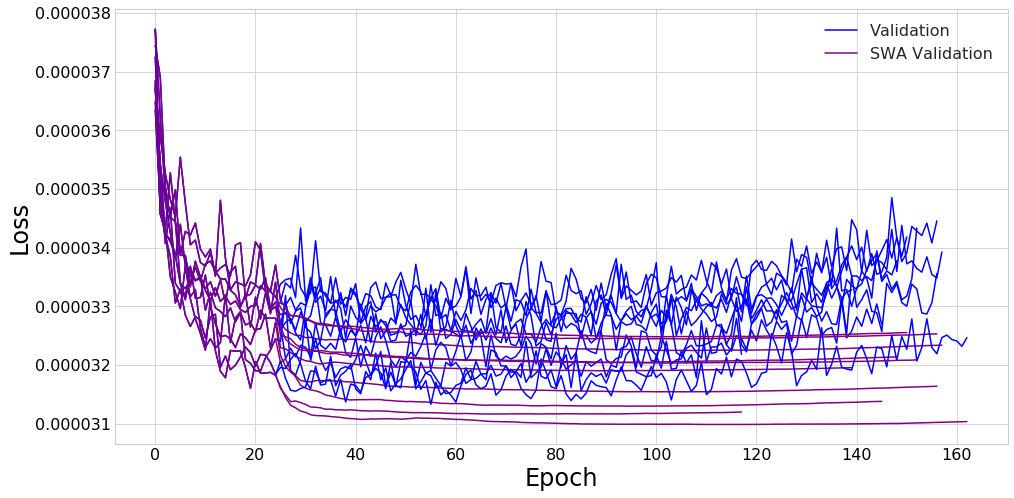

Mean loss = 3.18e-05 +- 2e-07
Mean wAUC = 0.0635 +- 0.0006
Mean AUC = 0.0995 +- 0.0007
Mean AMS = 4.1 +- 0.2
Mean cut = 0.961 +- 0.006
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          swaStart=25, swaRenewal=-1,
                                          patience=patience, verbose=1, amsSize=250000)

Once SWA is activated at epoch 125, we find that the validation loss goes through a rapid decrease followed by a plateau with large suppression of the statistical fluctuations.

Comparing to 5_Model_Data_Augmentation the metrics are mostly the same, except for the AMS which moves from3.98 to 4.04.

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 7 with loss = 3.098562448505687e-05
Model 1 is 5 with loss = 3.116454171613441e-05
Model 2 is 3 with loss = 3.129865115479333e-05
Model 3 is 1 with loss = 3.1543272483242715e-05
Model 4 is 4 with loss = 3.1901895607006734e-05
Model 5 is 8 with loss = 3.2033441372971866e-05
Model 6 is 2 with loss = 3.204431849108982e-05
Model 7 is 0 with loss = 3.224703173844511e-05
Model 8 is 6 with loss = 3.244413808133686e-05
Model 9 is 9 with loss = 3.2481478191901234e-05


## Response on validation data

In [10]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [12]:
%%time
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000832262933201855s per sample

Predicting batch 2 out of 10
Prediction took 0.00035201934979995714s per sample

Predicting batch 3 out of 10
Prediction took 0.00030500529620039745s per sample

Predicting batch 4 out of 10
Prediction took 0.0004818854587996611s per sample

Predicting batch 5 out of 10
Prediction took 0.00039805258239794056s per sample

Predicting batch 6 out of 10
Prediction took 0.0003404720858001383s per sample

Predicting batch 7 out of 10
Prediction took 0.0004053369480010588s per sample

Predicting batch 8 out of 10
Prediction took 0.00041917596960265656s per sample

Predicting batch 9 out of 10
Prediction took 0.000358483812797931s per sample

Predicting batch 10 out of 10
Prediction took 0.0003870396760001313s per sample

CPU times: user 23.7 s, sys: 657 ms, total: 24.4 s
Wall time: 21.4 s


In [13]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.902379876913453, weighted 0.9356766383502007


In [14]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.9253582750471168, 0.9622146)

In [15]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9612176293740049, corresponds to AMS of 3.851538270463765
CPU times: user 1.79 s, sys: 10.7 s, total: 12.5 s
Wall time: 2min 47s


(4.0, 0.96)

In the validation metrics we also find improvement over 5_Model_Data_Augmentation: overallAMS moves from 3.97 to 3.99, and AMS corresponding to mean cut increases to 3.97 from 3.91.

# Test scoring

In [16]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [17]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.0003203082500546853s per sample

Predicting batch 2 out of 10
Prediction took 0.00038677848303632345s per sample

Predicting batch 3 out of 10
Prediction took 0.0003741736387090482s per sample

Predicting batch 4 out of 10
Prediction took 0.00030760846741825597s per sample

Predicting batch 5 out of 10
Prediction took 0.0003700585736729078s per sample

Predicting batch 6 out of 10
Prediction took 0.00033597712672728285s per sample

Predicting batch 7 out of 10
Prediction took 0.000324804980490907s per sample

Predicting batch 8 out of 10
Prediction took 0.0003342968539636455s per sample

Predicting batch 9 out of 10
Prediction took 0.0003547227846728426s per sample

Predicting batch 10 out of 10
Prediction took 0.0004196098436180777s per sample

CPU times: user 3min 39s, sys: 7.31 s, total: 3min 46s
Wall time: 3min 14s


In [18]:
scoreTestOD(testData.source, 0.9612176293740049)

Public:Private AMS: 3.6342973839905603 : 3.6881528013734846


(3.6342973839905603, 3.6881528013734846)

Unfortunately, applying the cut to the test data shows an improvement in the public score (3.65->3.68) but a large decrease in private score (3.82->3.79)

# Save/Load

In [ ]:
name = "weights/Swish_SWA-125-Fixing"

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)